In [1]:
%pip install pandas seaborn matplotlib scikit-learn


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysing(tek değişeknli analiz)

In [5]:
df.describe() #temel istatiksel özet

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

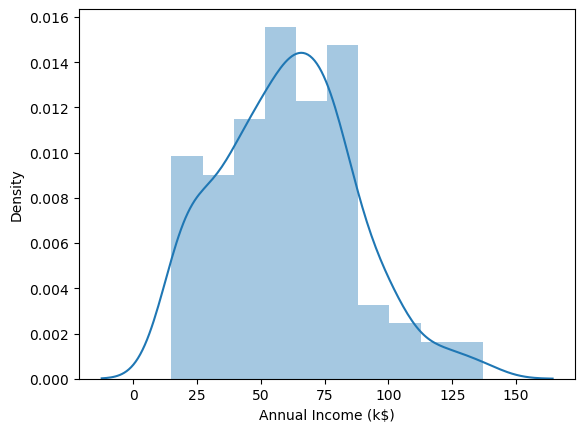

In [6]:
sns.distplot(df["Annual Income (k$)"])

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

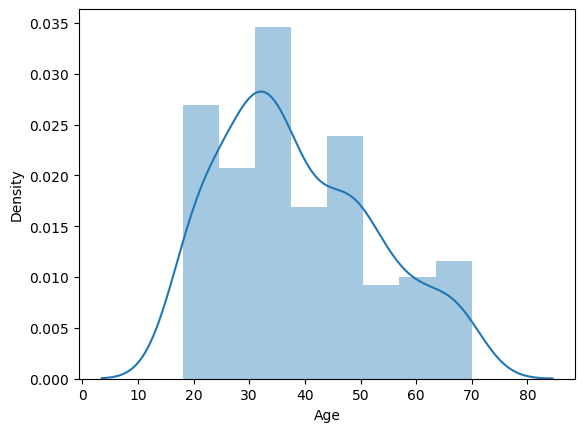

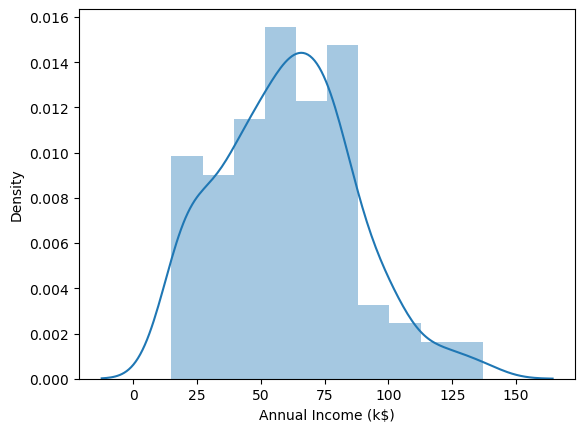

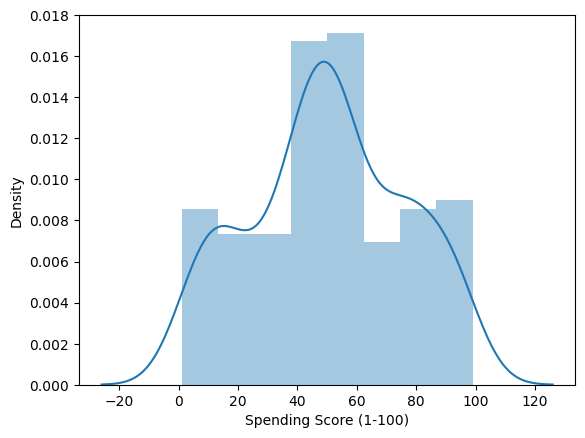

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

In [9]:
df["Gender"] = df["Gender"].astype("category")

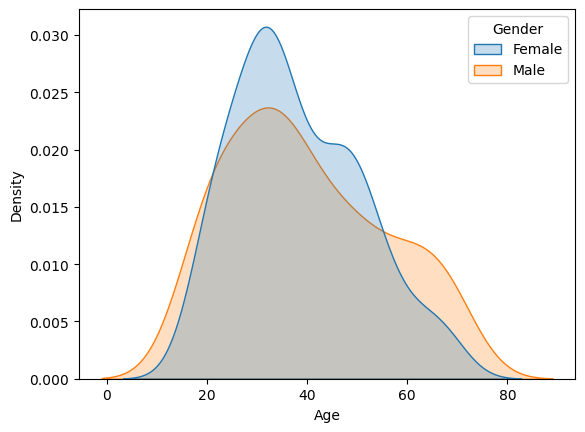

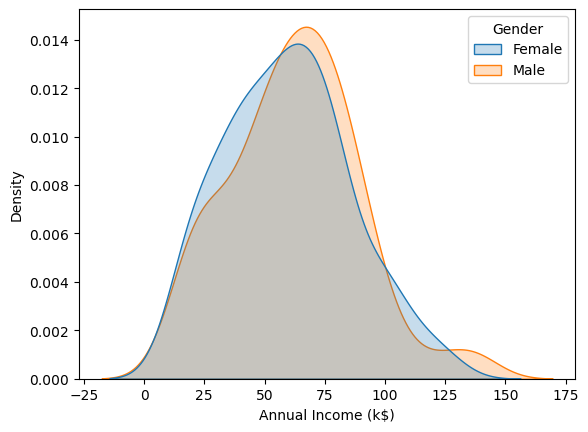

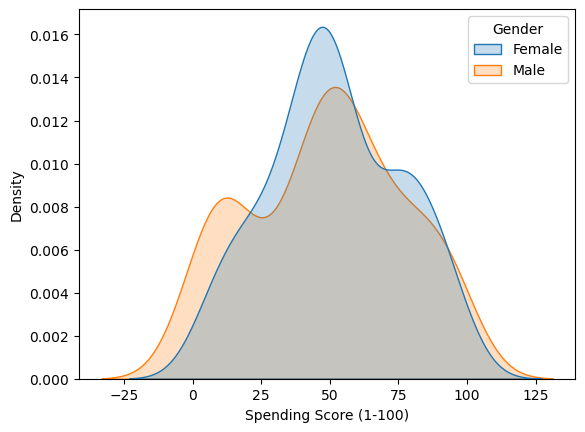

In [10]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure() #hepsini tek bir tabloda gosterilmesin
    sns.kdeplot(data=df,x=i,hue="Gender",fill = True,common_norm=False)

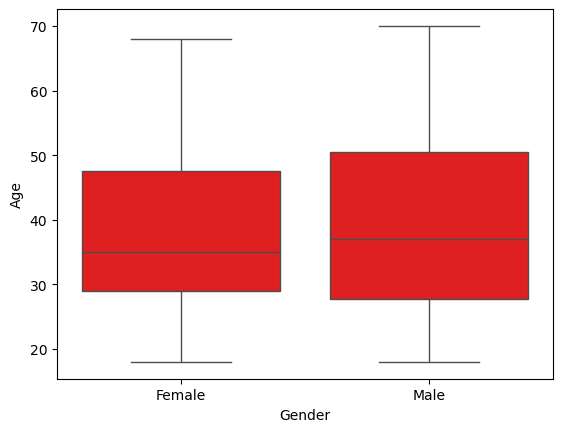

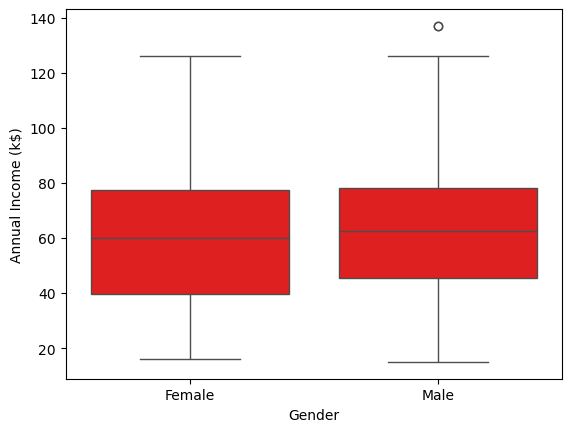

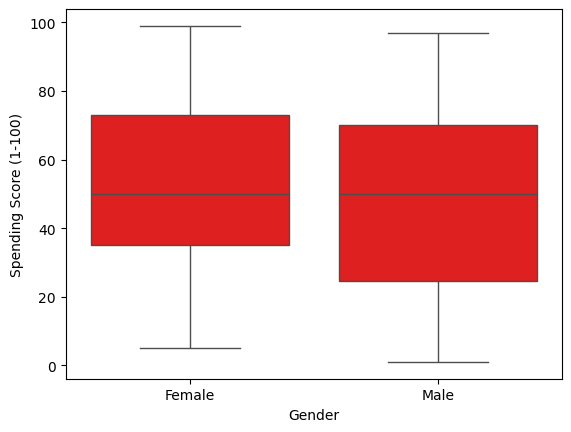

In [11]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure() #hepsini tek bir tabloda gosterilmesin
    sns.boxplot(data=df,x="Gender",y = df[i],color="red")

In [12]:
df["Gender"].value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

# Bivariate Analysing(iki değişkenlianaliz)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

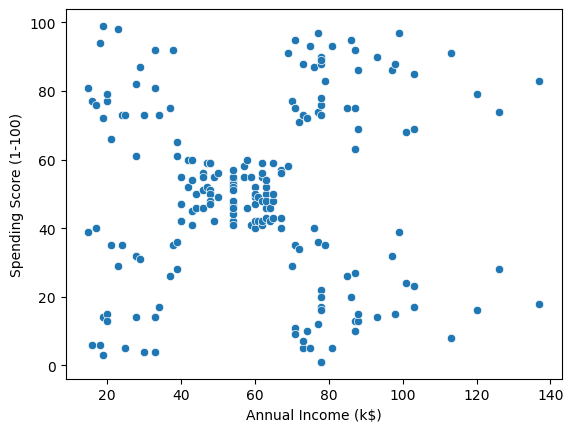

In [13]:
sns.scatterplot(data=df,x="Annual Income (k$)",y = "Spending Score (1-100)")

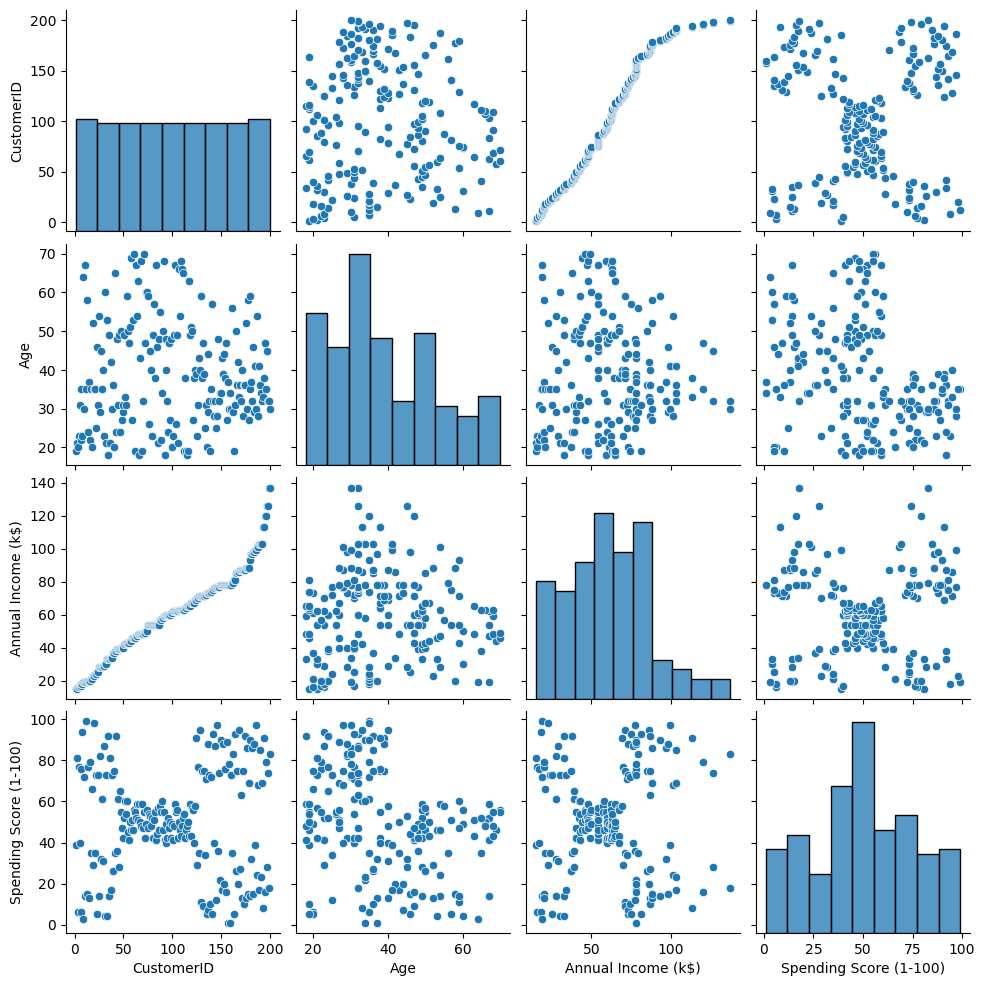

In [14]:
sns.pairplot(df)
#pairplot tüm mantrisler arasındakı ilişkiyi gösterir

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [16]:
df.groupby("Gender")[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
#mean sayısal degerlerın ortalamsını ifade eder
#groupby ise burada cinsiyeti gruplandırmak için kullanılmıştır

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df.corr(numeric_only= True)
#corr bir kolerasyon matrisi oluşturur nymaric only kullanmamızın nedeni string degerleri sayısala çeviremediği için bu stunları atlıyor

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


'\n"coolwarm" (Mavi → Kırmızı)\n"RdYlBu" (Kırmızı → Sarı → Mavi)\n"viridis" (Yeşil → Sarı → Mavi)\n"Blues" (Mavi tonları)\n'

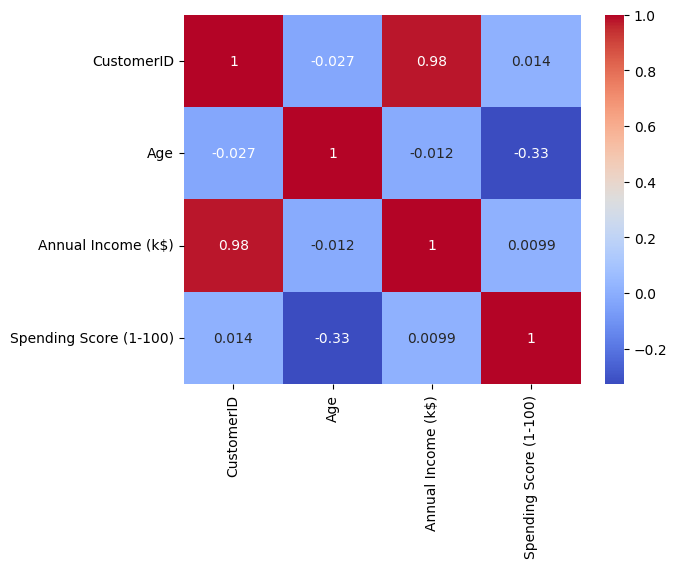

In [18]:
"""df.drop("CustomerID",axis=1)
#axis = 1 burada stunu silmek anlamına geliyor"""
sns.heatmap(df.corr(numeric_only= True),cmap="coolwarm",annot = True)
"""
"coolwarm" (Mavi → Kırmızı)
"RdYlBu" (Kırmızı → Sarı → Mavi)
"viridis" (Yeşil → Sarı → Mavi)
"Blues" (Mavi tonları)
"""
#annot ifadesi sayısal degerlerı tablo içinde yazdırmaya yarar

# Clustering, Unvariated,Biraviated,Multivariated

In [19]:
cluster1 = KMeans(n_clusters=3)  #n_clusters kumeleme sayısını ıfasde eder
"""
K-Means, kümeleme (clustering) için kullanılan bir makine öğrenmesi algoritmasıdır.
Veri noktalarını K farklı gruba ayırır ve her kümenin merkezine bir centroid belirler.
"""

'\nK-Means, kümeleme (clustering) için kullanılan bir makine öğrenmesi algoritmasıdır.\nVeri noktalarını K farklı gruba ayırır ve her kümenin merkezine bir centroid belirler.\n'

In [20]:
cluster1.fit(df[["Annual Income (k$)"]])
#yıllık geliri sınıflandırdık
# fit ???

KMeans(n_clusters=3)

In [21]:
cluster1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
df["Income Cluster"] = cluster1.labels_

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [24]:
df["Income Cluster"].value_counts()

Income Cluster
0    92
1    72
2    36
Name: count, dtype: int64

In [25]:
cluster1.inertia_
#Bu, modelin veri setini kümeleme sürecinde hesapladığı hata kareleri toplamıdır.

23528.152173913048

In [26]:
inertia_scores = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmean.inertia_)

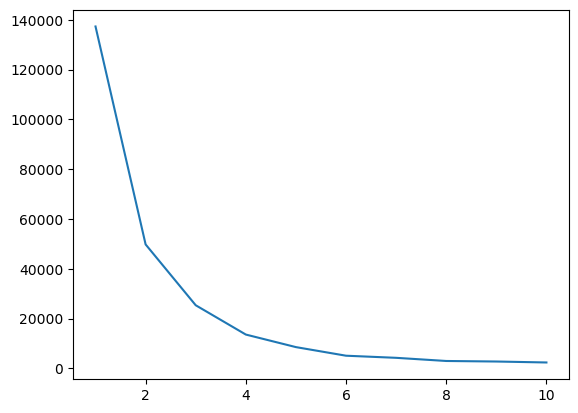

In [27]:
plt.plot(range(1,11),inertia_scores)

In [28]:
df.groupby("Income Cluster")[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


In [32]:
#yıllık gelirir ve harcama puanını kumeleyeclım
cluster2 = KMeans(n_clusters=5)
cluster2.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])
df["Spending and Income"] = cluster2.labels_

In [42]:
centers = pd.DataFrame(cluster2.cluster_centers_)
centers.columns = ["x","y"]

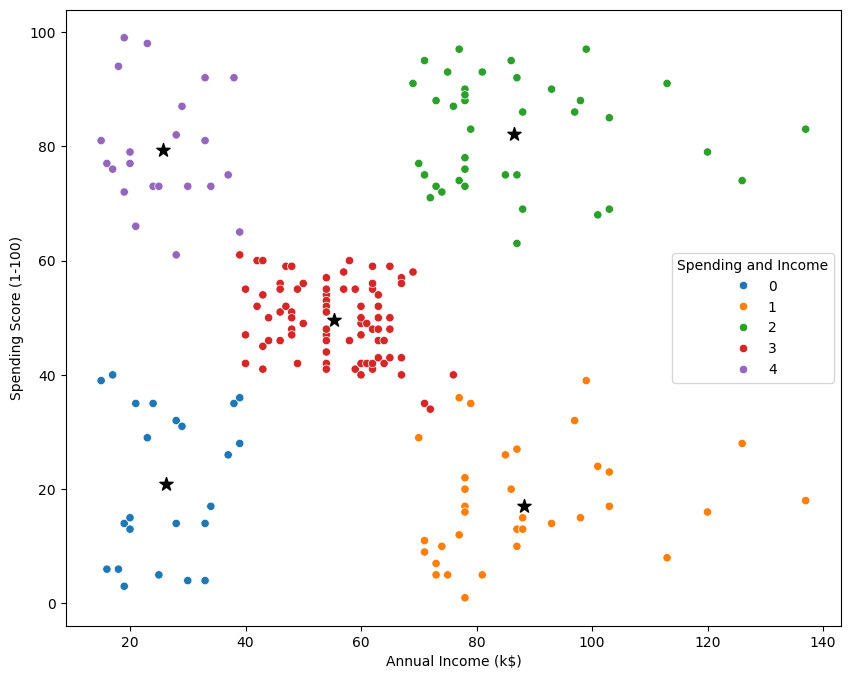

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers["x"],y = centers["y"],s = 100,c = "black",marker ="*")
sns.scatterplot(data = df,x="Annual Income (k$)",y="Spending Score (1-100)",hue ="Spending and Income",palette= "tab10")
plt.savefig("clustering_bivariate.png")

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [54]:
dff = pd.get_dummies(df,drop_first=True) 
#kategorık verileri sayısal degerlere donusturmek için kullanılır buradaise GEnderi erkek ve kadın olarak 2 yeni stun halınde 1 = TRue 2 = False seklınde kullanmıstır
#drop first = True burada female stunnu dusurdu bu işlem veri seti boyutunu kucultmek iiçn yapılır.


In [55]:
dff

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income,Gender_Male
0,1,19,15,39,1,0,True
1,2,21,15,81,1,4,True
2,3,20,16,6,1,0,False
3,4,23,16,77,1,4,False
4,5,31,17,40,1,0,False
...,...,...,...,...,...,...,...
195,196,35,120,79,2,2,False
196,197,45,126,28,2,1,False
197,198,32,126,74,2,2,True
198,199,32,137,18,2,1,True


In [56]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income', 'Gender_Male'],
      dtype='object')

In [59]:
dff = scaler.fit_transform(dff)

In [60]:
dff = pd.DataFrame(scaler.fit_transform(dff))

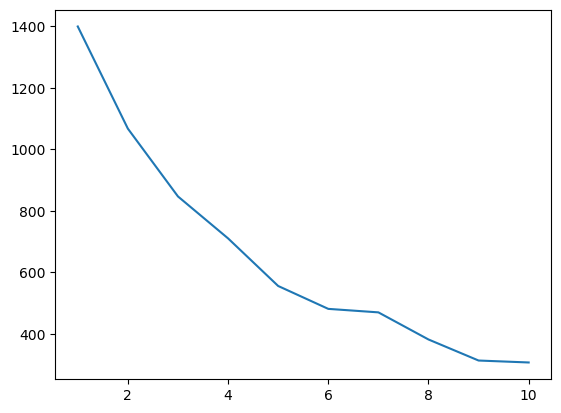

In [63]:
inertia_scores3 = []
for i in range(1,11):
    kmean3 = KMeans(n_clusters=i)
    kmean3.fit(dff)
    inertia_scores3.append(kmean3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [64]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,1


In [66]:
df.to_csv("clustering.csv")